In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from datetime import date
import seaborn as sns
from pydataset import data
from env import host, user, password
from wrangle import wrangle_telco
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [2]:
telco = wrangle_telco()

In [3]:
telco

,customer_id,monthly_charges,tenure,total_charges
0,0002-ORFBO,65.60,9,593.30
1,0020-JDNXP,61.25,34,1993.20
2,0022-TCJCI,62.70,45,2791.50
3,0023-UYUPN,25.20,50,1306.30
4,0036-IHMOT,103.70,55,5656.75
...,...,...,...,...
1468,9968-FFVVH,68.80,63,4111.35
1469,9972-VAFJJ,94.00,53,4871.45
1470,9978-HYCIN,84.95,47,4018.05
1471,9979-RGMZT,94.05,7,633.45


In [4]:
# Apply the scalers we talked about in this lesson to your data and visualize the results

telco.drop(columns = ['customer_id'], inplace = True)
train, test = train_test_split(telco, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)
scaler_minmax = sklearn.preprocessing.MinMaxScaler()
scaler_minmax.fit(train)

MinMaxScaler()

In [5]:
train_minmax = scaler_minmax.transform(train)
train_minmax = pd.DataFrame(train_minmax)
train_minmax.rename(columns = {0: 'monthly_charges', 1: 'tenure', 2: 'total_charges'}, inplace = True)

Text(0.5, 1.0, 'Min Max Scaled')

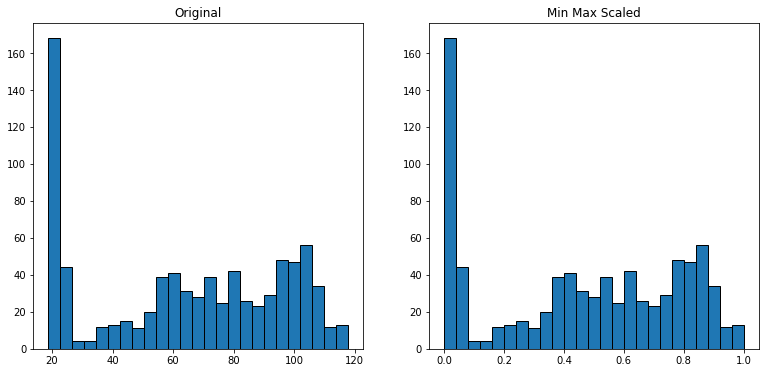

In [6]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_minmax.monthly_charges, bins=25, ec='black')
plt.title('Min Max Scaled')

In [7]:
scaler_stan = sklearn.preprocessing.StandardScaler()

In [8]:
scaler_stan.fit(train)
train_stan = scaler_stan.transform(train)
train_stan = pd.DataFrame(train_stan)
train_stan.rename(columns = {0: 'monthly_charges', 1: 'tenure', 2: 'total_charges'}, inplace = True)

Text(0.5, 1.0, 'Standard Scaled')

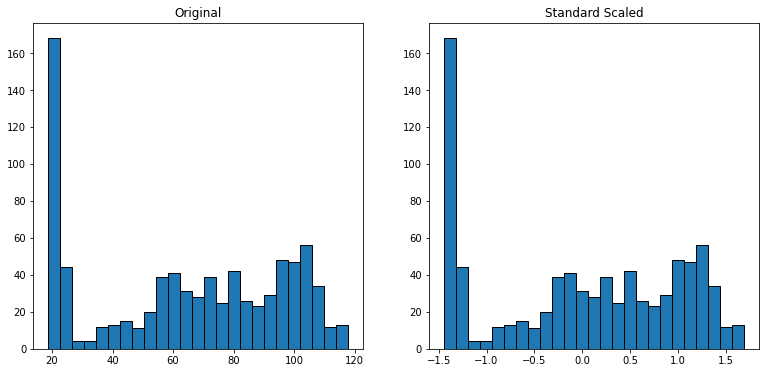

In [9]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_stan.monthly_charges, bins=25, ec='black')
plt.title('Standard Scaled')

In [10]:
scaler_rob = sklearn.preprocessing.RobustScaler()

In [11]:
scaler_rob.fit(train)
train_rob = scaler_rob.transform(train)
train_rob = pd.DataFrame(train_rob)
train_rob.rename(columns = {0: 'monthly_charges', 1: 'tenure', 2: 'total_charges'}, inplace = True)

Text(0.5, 1.0, 'Robust Scaled')

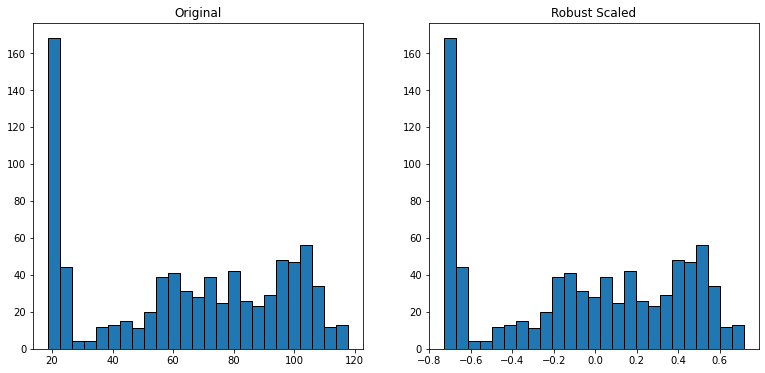

In [12]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_rob.monthly_charges, bins=25, ec='black')
plt.title('Robust Scaled')

In [19]:
# Apply the .inverse_transform method to your scaled data.
# Is the resulting dataset the exact same as the original data?
# Yes, except tenure has been made into a float

inverse = scaler_rob.inverse_transform(train_rob)
inverse = pd.DataFrame(inverse)
inverse.rename(columns = {0: 'monthly_charges', 1: 'tenure', 2: 'total_charges'}, inplace = True)

Text(0.5, 1.0, 'Scaled and Inversed')

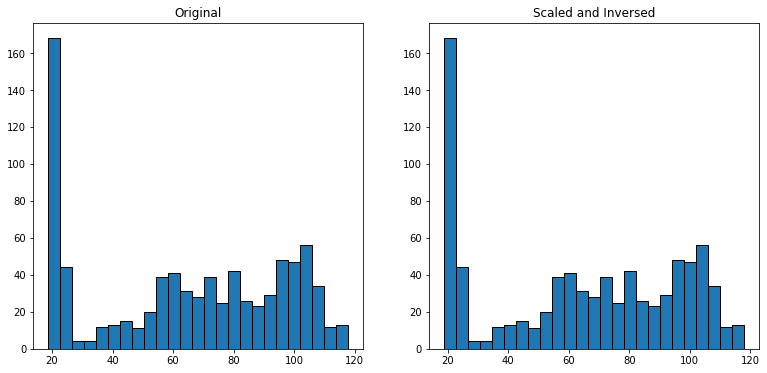

In [20]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(inverse.monthly_charges, bins=25, ec='black')
plt.title('Scaled and Inversed')

In [22]:
inverse

,monthly_charges,tenure,total_charges
0,100.45,49.0,4941.80
1,70.95,48.0,3629.20
2,74.00,52.0,3877.65
3,95.00,38.0,3591.25
4,106.15,59.0,6256.20
...,...,...,...
819,86.90,57.0,4939.25
820,20.95,25.0,495.15
821,96.75,53.0,5206.55
822,50.80,9.0,463.60


In [23]:
train

,monthly_charges,tenure,total_charges
1352,100.45,49,4941.80
239,70.95,48,3629.20
113,74.00,52,3877.65
584,95.00,38,3591.25
1463,106.15,59,6256.20
...,...,...,...
682,86.90,57,4939.25
504,20.95,25,495.15
764,96.75,53,5206.55
1230,50.80,9,463.60


In [27]:
# Read the documentation for sklearn's QuantileTransformer. 
# Use normal for the output_distribution and apply this scaler to your data. 
# Visualize the result of your data scaling.

scaler_quant = sklearn.preprocessing.QuantileTransformer(n_quantiles=100, output_distribution='normal')

In [28]:
scaler_quant.fit(train)
train_quant = scaler_quant.transform(train)
train_quant = pd.DataFrame(train_quant)
train_quant.rename(columns = {0: 'monthly_charges', 1: 'tenure', 2: 'total_charges'}, inplace = True)

Text(0.5, 1.0, 'Quantile transformer')

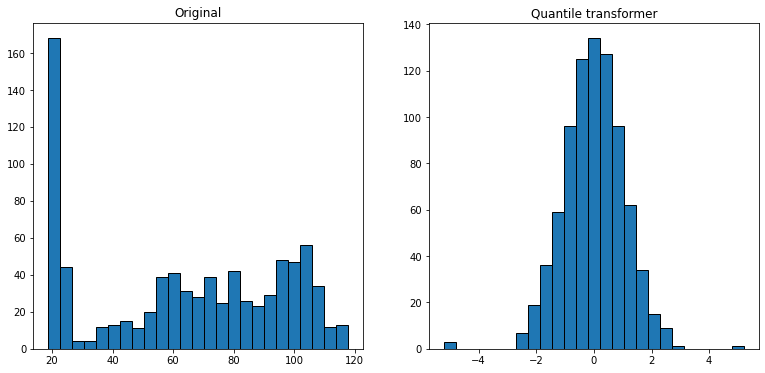

In [31]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_quant.monthly_charges, bins=25, ec='black')
plt.title('Quantile transformer')

In [30]:
scaler_quant2 = sklearn.preprocessing.QuantileTransformer(n_quantiles=100)
scaler_quant2.fit(train)
train_quant2 = scaler_quant2.transform(train)
train_quant2 = pd.DataFrame(train_quant2)
train_quant2.rename(columns = {0: 'monthly_charges', 1: 'tenure', 2: 'total_charges'}, inplace = True)

Text(0.5, 1.0, 'Quantile w/o output')

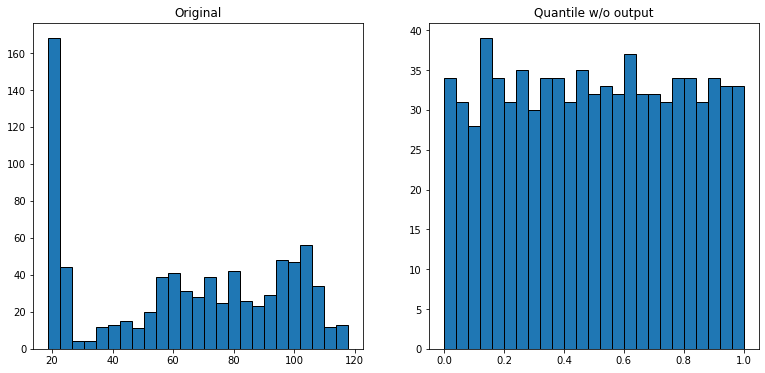

In [33]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_quant2.monthly_charges, bins=25, ec='black')
plt.title('Quantile w/o output')